Подключение библиотек.

In [115]:
%matplotlib inline
import numpy as np
from scipy.stats import multivariate_normal
from scipy.spatial.distance import mahalanobis
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import erlang
import scipy.stats as stats
from scipy.optimize import fsolve

Ввод данных.

In [116]:
data = [0.0436794, 0.166035, 0.0604577, 0.0962837, 0.023529, 0.11326, \
0.404622, 0.354139, 0.308872, 0.032605, 0.098301, 0.426906, 0.434665, \
0.35626, 1.90448, 0.818334, 0.486652, 1.59797, 0.0825811, 0.254232, \
0.220093, 0.251865, 0.368748, 1.8966, 0.752856, 0.378332, 0.944809, \
0.994282, 0.061186, 0.000524252, 0.0606311, 0.0729079, 1.07185, \
1.43861, 0.60779, 1.02583, 1.0875, 0.27009, 0.0328377, 0.791727, \
0.247701, 0.00471008, 0.0103316, 0.185637, 0.113057, 0.716332, \
1.05568, 0.207986, 0.887598, 0.535853, 0.876685, 0.315642, 0.0141932, \
0.0937924, 0.305066, 0.202327, 0.524695, 0.00939518, 0.516412, \
0.620611, 0.0967764, 0.0163088, 0.316691, 0.336694, 0.229255, \
0.826508, 0.276018, 0.243225, 1.26453, 0.955482, 0.491383, 0.182187, \
0.128007, 0.170854, 0.424113, 0.0838754, 0.137054, 0.131947, \
0.504065, 0.0496643, 0.171981, 0.784873, 0.95644, 0.575638, \
0.0665862, 0.16751, 0.379834, 0.228268, 0.388329, 0.94044, 0.0440389, \
0.303095, 0.36334, 1.14763, 0.213201, 0.396905, 0.250873, 0.150599, \
0.2895, 1.16509, 0.265498, 0.560802, 0.363842, 0.0354809, 0.0287385, \
0.404331, 0.117715, 0.205864, 0.0535385, 0.443829, 0.0955239, \
0.0435538, 0.101079, 0.653438, 0.908184, 0.583681, 0.200702, \
0.214355, 0.0032679, 0.0244118, 0.329929, 0.499287, 0.420374, \
0.0851347, 0.175401, 0.177086, 0.106934, 0.023994, 0.00586, 0.123103, \
0.316923, 0.367377, 0.418499, 0.356524, 0.376066, 0.0201693, \
0.389433, 0.230155, 0.579766, 0.896395, 0.218018, 0.0531565, \
0.317389, 0.370752, 0.371218, 0.375285, 0.677023, 0.0246592, \
0.345195, 0.0115658, 0.814462, 0.00657833, 0.176033, 0.612912, \
0.319484, 0.129894, 0.532801, 0.0571202, 0.0425041, 0.669363, \
0.499122, 0.544739, 0.201162, 0.332702, 0.440401, 0.538023, 0.125401, \
1.08728, 0.423711, 0.903539, 0.221519, 0.11238, 0.158885, 0.963678, \
0.280555, 0.48023, 0.288202, 0.100392, 0.129658, 0.0755764, 0.126633, \
0.0142448, 0.518066, 0.535232, 0.0371798, 0.574612, 0.147001, \
0.30566, 0.275454, 0.320081, 0.0720025, 0.00208185, 0.245711, \
0.215984, 1.04385, 0.240841, 0.584268, 0.79101, 0.0847973, 0.982576
]

**Задание 1. Построение гистограммы по правилу Стёрджеса.**

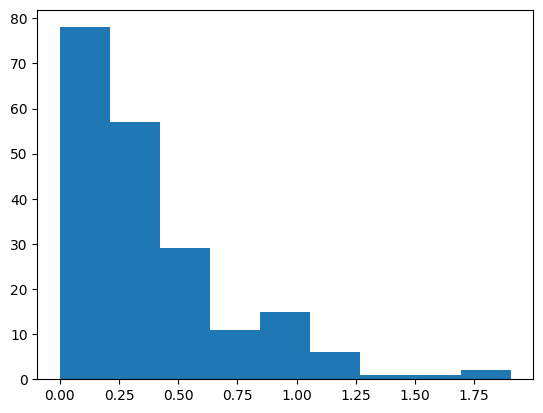

In [117]:
plt.hist(data, "sturges")
plt.show()

Гистограмма была построена по правилу Стёрджеса. Значения начинаются с 0 и заканчиваются примерно на 1.9. Больше всего значений наблюдается на интервале 0 - 0.2. Далее количество значений на интервалах постепенно убывает.

**Задание 2. Построение графиков гипотетических плотностей распределения.**

Ищем тетта с крышкой для нормального распределения (метод максимального правдоподобия).

In [118]:
norm_sd = 0.25
thetta_0 = norm.fit(data, fscale = norm_sd) 
norm_mu = thetta_0[0]
norm_mu

0.38020772696

Ищем тетта с крышкой для экспоненциального распределения (метод максимального правдоподобия).

In [119]:
thetta_1 = expon.fit(data, floc = 0) 
expon_mu = thetta_1[1]
1 / expon_mu

2.6301411809687014

График плотности распределения для нормального распределения.

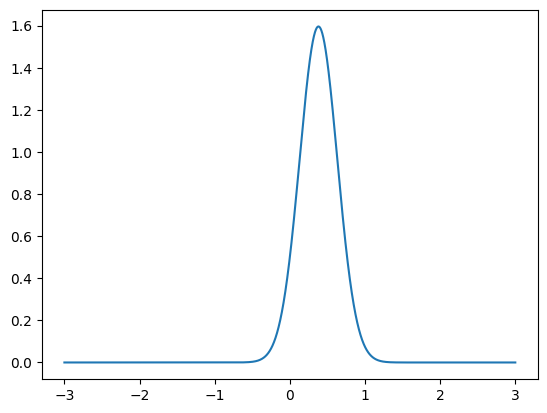

In [120]:
x_axis = np.arange(-3, 3, 0.001)
plt.plot(x_axis, norm.pdf(x_axis, norm_mu, norm_sd))
plt.show()

График плотности распределения для экспоненциального распределения.

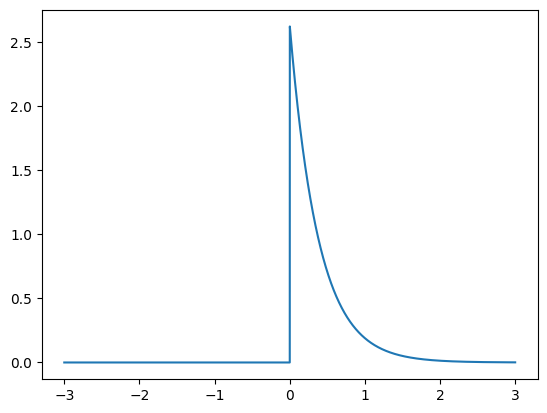

In [121]:
plt.plot(x_axis, expon.pdf(x_axis, scale = expon_mu))
plt.show()

Из графиков можно предположить, что экспоненциальное распределение лучше описывает данные, чем нормальное распределение. Сравнивая с гистограммой, график плотности распределения экспоненциального распределения принимает очень похожие значения, он также убывает на положительной части оси. Также нормальное распределение включает в себя отрицательные значения, что не соответствует нашим данным, в нашем случае все значения положительные.

**Задание 3. Критерий хи-квадрат.**

Построение разбиения.

In [122]:
x0 = np.NINF
x1 = 0.1
x2 = 0.3
x3 = 0.7
x4 = np.Inf
x = [x0, x1, x2, x3, x4]
x


[-inf, 0.1, 0.3, 0.7, inf]

Подсчёт количества значений из выборки в интервалах (частоты).

In [123]:
freq = np.empty(len(x) - 1, dtype=int)
for i in range(len(x) - 1):
    freq[i] = sum(x[i] < j <= x[i + 1] for j in data)
freq

array([46, 55, 66, 33])

Подсчёт теоретических частот для нормального распределения.

In [124]:
exp_freq = np.empty(len(x) - 1, dtype=float)
for i in range(len(x) - 1):
    exp_freq[i] = (norm.cdf(x[i + 1], loc = norm_mu, scale = norm_sd) - norm.cdf(x[i], loc = norm_mu, scale = norm_sd)) * len(data)
exp_freq

array([ 26.23598452,  48.59786903, 105.08239472,  20.08375173])

Критические значения из таблиц.

In [125]:
alpha_1 = 0.1
crit_val_1 = 6.251
print("Критическое значение для уровня значимости " + str(alpha_1) + ": " + str(crit_val_1))
alpha_2 = 0.02
crit_val_2 = 9.837
print("Критическое значение для уровня значимости " + str(alpha_2) + ": " + str(crit_val_2))

Критическое значение для уровня значимости 0.1: 6.251
Критическое значение для уровня значимости 0.02: 9.837


Проверка статистики для нормального распределения.

In [126]:
chis, p = stats.chisquare(freq, exp_freq)
print("Значение статистики: " + str(chis))
if (chis > crit_val_1):
    print("Гипотеза о нормальном распределении отклонена для уровня значимости " + str(alpha_1))
else:
    print("Гипотеза о нормальном распределении принята для уровня значимости " + str(alpha_1))

if (chis > crit_val_2):
    print("Гипотеза о нормальном распределении отклонена для уровня значимости " + str(alpha_2))
else:
    print("Гипотеза о нормальном распределении принята для уровня значимости " + str(alpha_2))

Значение статистики: 38.57423596978156
Гипотеза о нормальном распределении отклонена для уровня значимости 0.1
Гипотеза о нормальном распределении отклонена для уровня значимости 0.02


Подсчёт теоретических частот для экспоненциального распределения.

In [127]:
for i in range(len(x) - 1):
    exp_freq[i] = (expon.cdf(x[i + 1], scale = expon_mu) - expon.cdf(x[i], scale = expon_mu)) * len(data)
exp_freq

array([46.25379116, 62.89028365, 59.12732337, 31.72860183])

Проверка статистики для экспоненциального распределения.

In [128]:
chis, p = stats.chisquare(freq, exp_freq)
print("Значение статистики: " + str(chis))
if (chis > crit_val_1):
    print("Гипотеза об экспоненциальном распределении отклонена для уровня значимости " + str(alpha_1))
else:
    print("Гипотеза об экспоненциальном распределении принята для уровня значимости " + str(alpha_1))

if (chis > crit_val_2):
    print("Гипотеза об экспоненциальном распределении отклонена для уровня значимости " + str(alpha_2))
else:
    print("Гипотеза об экспоненциальном распределении принята для уровня значимости " + str(alpha_2))

Значение статистики: 1.8411093713116276
Гипотеза об экспоненциальном распределении принята для уровня значимости 0.1
Гипотеза об экспоненциальном распределении принята для уровня значимости 0.02


Из результатов критерия видно, что гипотеза о нормальном распределении была отклонена для обоих уровней значимости. Гипотеза же об экспоненциальном распределении наоборот была принята для предложенных уровней значимости. Таким образом, наше предположение в прошлом пункте о том, что исходные данные соответствуют выборке из экспоненциального распределения, подтверждается.

**Задание 4. Критерий Неймана-Пирсона.**

Критерий Неймана-Пирсона при уровне значимости 0.1.

In [129]:
def f(x): return 0.9 - stats.erlang.cdf(x, a = len(data), scale = 0.2)
solve_1 = fsolve(f, 45)
h_alpha_1 = solve_1[0]
if (sum(data) < h_alpha_1):
    print("Принимается гипотеза H0 об экспоненциальном распределении c параметром 0.2 для уровня значимости " + str(0.1))
else:
    print("Принимается гипотеза H1 об экспоненциальном распределении c параметром 0.3 для уровня значимости " + str(0.1))


Принимается гипотеза H1 об экспоненциальном распределении c параметром 0.3 для уровня значимости 0.1


Критерий Неймана-Пирсона при уровне значимости 0.02.

In [130]:
def f(x): return 0.98 - stats.erlang.cdf(x, a = len(data), scale = 0.2)
solve_2 = fsolve(f, 45)
h_alpha_2 = solve_2[0]
if (sum(data) < h_alpha_2):
    print("Принимается гипотеза H0 об экспоненциальном распределении c параметром 0.2 для уровня значимости " + str(0.02))
else:
    print("Принимается гипотеза H1 об экспоненциальном распределении c параметром 0.3 для уровня значимости " + str(0.02))

Принимается гипотеза H1 об экспоненциальном распределении c параметром 0.3 для уровня значимости 0.02


При использовании критерия Неймана-Пирсона в качестве достаточной статистики была использована сумма элементов выборки. Из результатов, полученных при применении критерия для принятия одной из гипотез (H0: математическое ожидание равняется 0.2; H1: математическое ожидание равняется 0.3), следует, что решающее правило было построено правильно: нетрудно заметить, что исходные данные распределены по экспоненциальному закону с параметром, равным 2.63, и, следовательно, матожиданием, равным 0.38. Очевидно, что должна быть принята гипотеза H1, так как она ближе к данному распределению.
Также отметим, что вследствие леммы Неймана-Пирсона данный критерий будет иметь максимальную мощность.

**Задание 5. Мощность критерия Неймана-Пирсона.**

Мощность критерия Неймана-Пирсона при уровне значимости 0.1.

In [131]:
w_1 = 1 - stats.erlang.cdf(h_alpha_1, a = len(data), scale = 0.3)
print("Мощность критерия Неймана-Пирсона при уровне значимости 0.1: " + str(w_1))

Мощность критерия Неймана-Пирсона при уровне значимости 0.1: 0.9999890337935134


Мощность критерия Неймана-Пирсона при уровне значимости 0.02.

In [132]:
w_2 = 1 - stats.erlang.cdf(h_alpha_2, a = len(data), scale = 0.3)
print("Мощность критерия Неймана-Пирсона при уровне значимости 0.02: " + str(w_2))

Мощность критерия Неймана-Пирсона при уровне значимости 0.02: 0.9998203569107305


Были вычислены мощности для критериев с разными уровнями значимости. Можно заметить, что при меньшем уровне значимости была получена и меньшая мощность критерия, то есть большая вероятность ошибки вторго рода. Из полученных результатов можно сделать следующий вывод: при уменьшении уровня значимости происходит и уменьшение мощности критерия, и наоборот: увеличение уровня значимости приведёт к увеличению мощности критерия. Это представляется очевидным, так как известно, что невозможно одновременно минимизировать ошибки первого и второго рода, то есть и увеличить уровень значимости, и мощность критерия.